-1.051927981216962 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0519279812169617


/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_18537/2771404717.py:29: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f_main.show()
/Users/rbrady0110/Library/Python/3.9/lib/python/site-packages/lenstronomy/Plots/model_band_plot.py:1111: RuntimeWarning: invalid value encountered in log10
  np.log10(model),
/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_18537/2771404717.py:32: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f_sep.show()
/Users/rbrady0110/Library/Python/3.9/lib/python/site-packages/lenstronomy/Plots/model_band_plot.py:1168: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data - model),
/var/folders/74/9yc0dt9d53z15d2qpmgpxv4h0000gn/T/ipykernel_18537/2771404717.py:35: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  f_res.show()


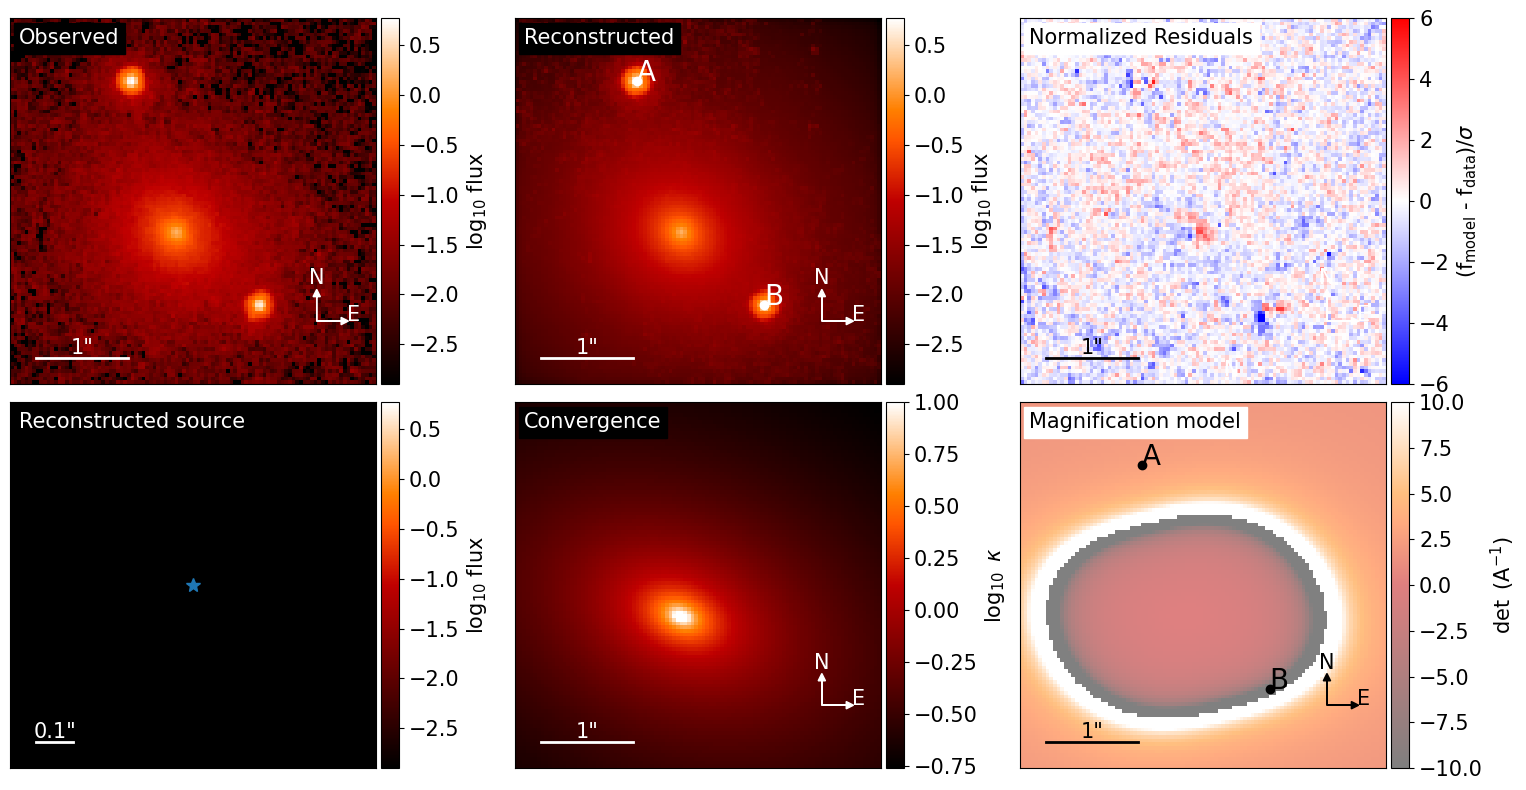

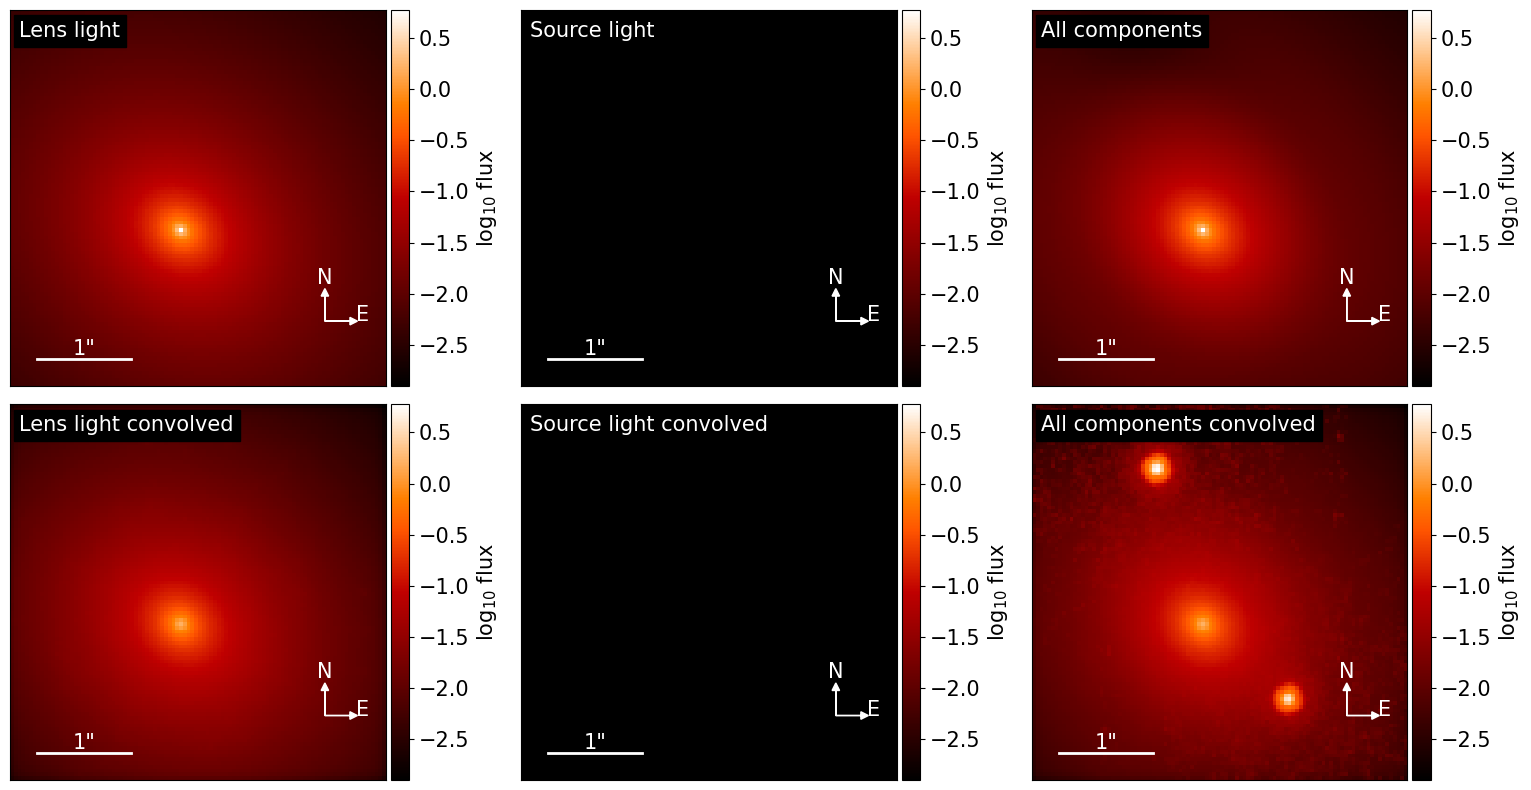

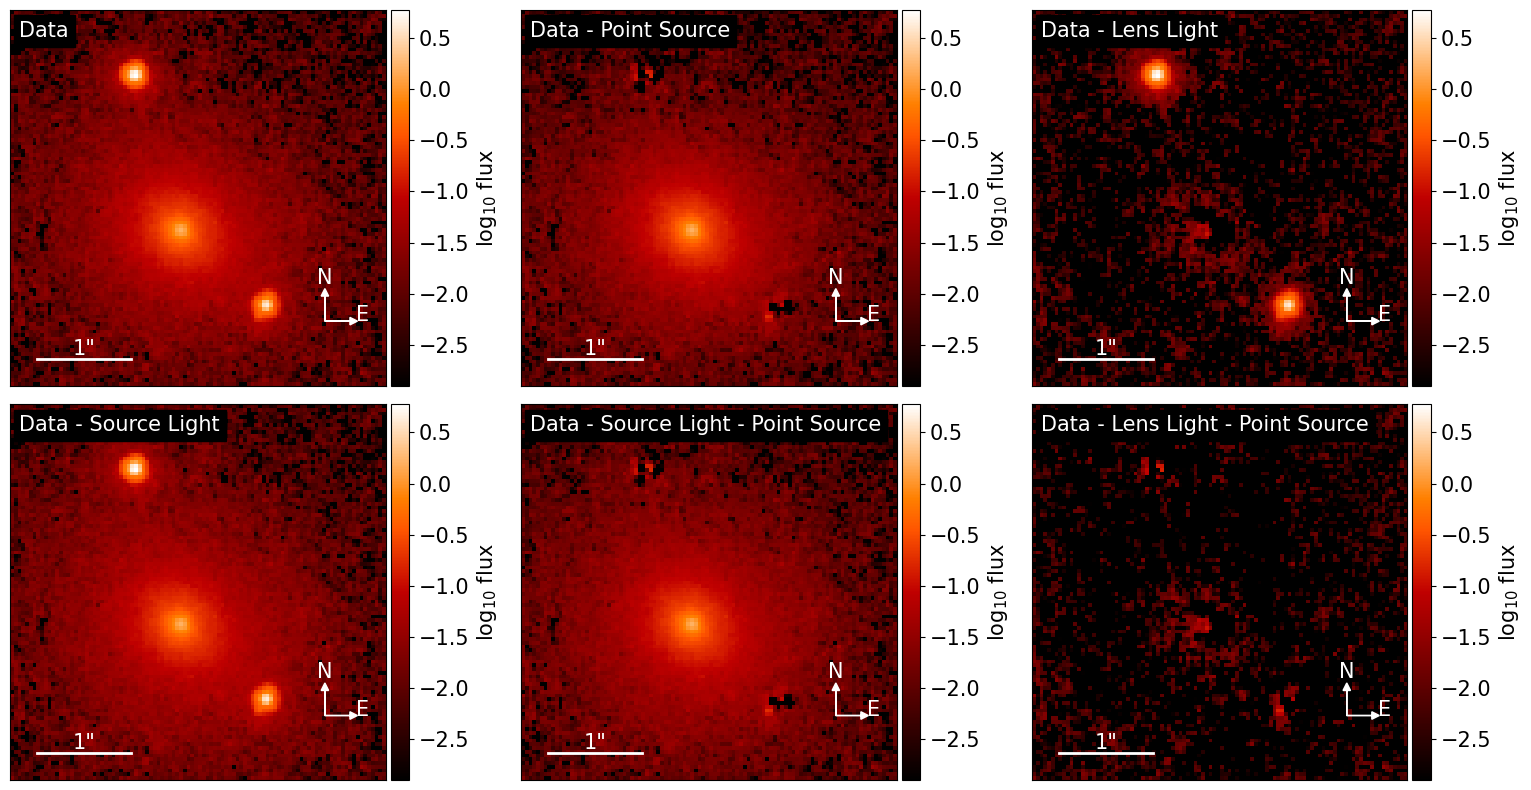

In [18]:
# example loading in model data and looking at 
# some diagnostics

import pickle
from lenstronomy.Plots.model_plot import ModelPlot
from lenstronomy.Plots import chain_plot
from lenstronomy.Workflow.fitting_sequence import FittingSequence

name = "J2325-5229"
filter = "F814W"
filename = f"cutout_data/{name}/{filter}/{name}_{filter}_fit.pkl"

# load the saved data and plot the models
with open(filename, "rb") as f:
    loaded_data = pickle.load(f)

kwargs_result = loaded_data["kwargs_result"]
multi_band_list = loaded_data["multi_band_list"]
kwargs_model = loaded_data["kwargs_model"]
kwargs_params = loaded_data.get("kwargs_params", None)
chain_list = loaded_data.get('chain_list')
kwargs_constraints = loaded_data.get("kwargs_constraints", None)
kwargs_likelihood = loaded_data.get("kwargs_likelihood", None)
kwargs_data_joint = loaded_data.get("kwargs_data_joint", None)

modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="gist_heat")

f_main, axes_main = modelPlot.plot_main()
f_main.show()

f_sep, axes_sep = modelPlot.plot_separate()
f_sep.show()

f_res, axes_res = modelPlot.plot_subtract_from_data_all()
f_res.show()

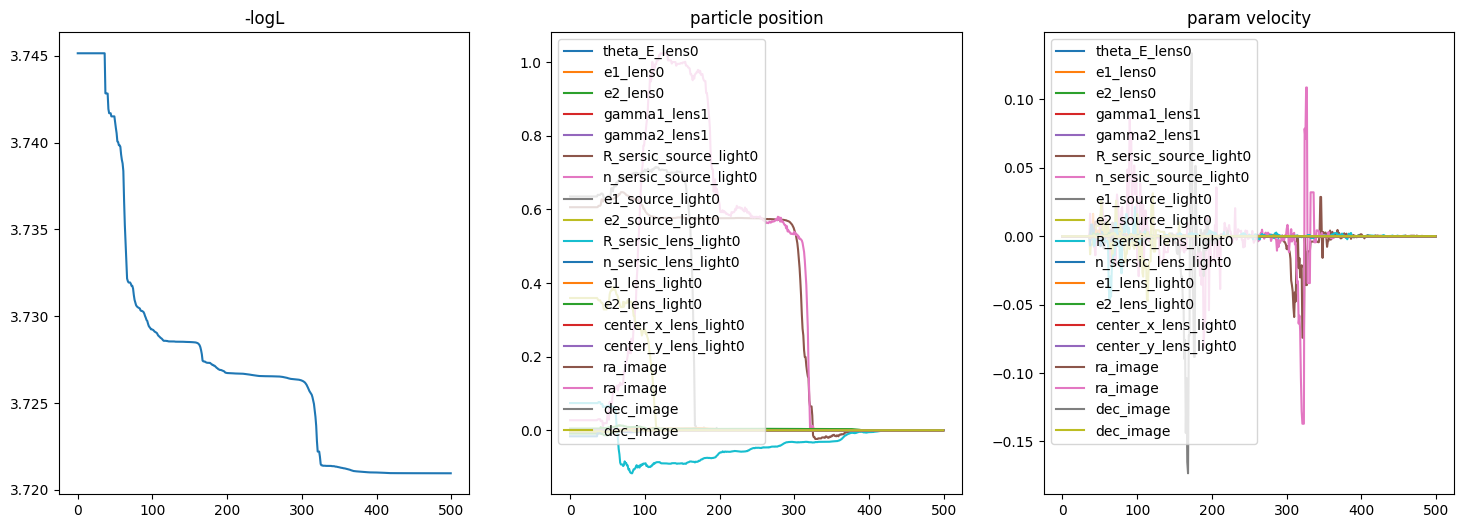

<Figure size 640x480 with 0 Axes>

In [19]:
fitting_seq = FittingSequence(kwargs_data_joint, kwargs_model, kwargs_constraints, kwargs_likelihood, kwargs_params)

# analyze the PSO
param = fitting_seq.param_class

for i in range(len(chain_list)):
    chain_plot.plot_chain_list(chain_list, i)

/Users/rbrady0110/Library/Python/3.9/lib/python/site-packages/lenstronomy/Data/psf.py:95: UserWarning: Input PSF model has at least one negative element, which is unphysical except for a PSF of an interferometric array.
  warnings.warn(
/Users/rbrady0110/Library/Python/3.9/lib/python/site-packages/lenstronomy/Plots/model_band_plot.py:160: RuntimeWarning: invalid value encountered in log10
  np.log10(self._data),
/Users/rbrady0110/Library/Python/3.9/lib/python/site-packages/lenstronomy/Plots/model_band_plot.py:67: RuntimeWarning: invalid value encountered in log10
  log_model = np.log10(model)
/Users/rbrady0110/Library/Python/3.9/lib/python/site-packages/lenstronomy/Plots/model_band_plot.py:224: RuntimeWarning: invalid value encountered in log10
  np.log10(self._model),


-1.051927981216962 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0519279812169617
-1.2838829260056628 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.2838829260056628
-1.0606509651897562 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.0606509651897567
-1.1009819050169434 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.1009819050169436
-1.1966294006249936 reduced X^2 of all evaluated imaging data combined (without degrees of freedom subtracted).
reduced chi^2 of data  0 =  1.1966294006249938


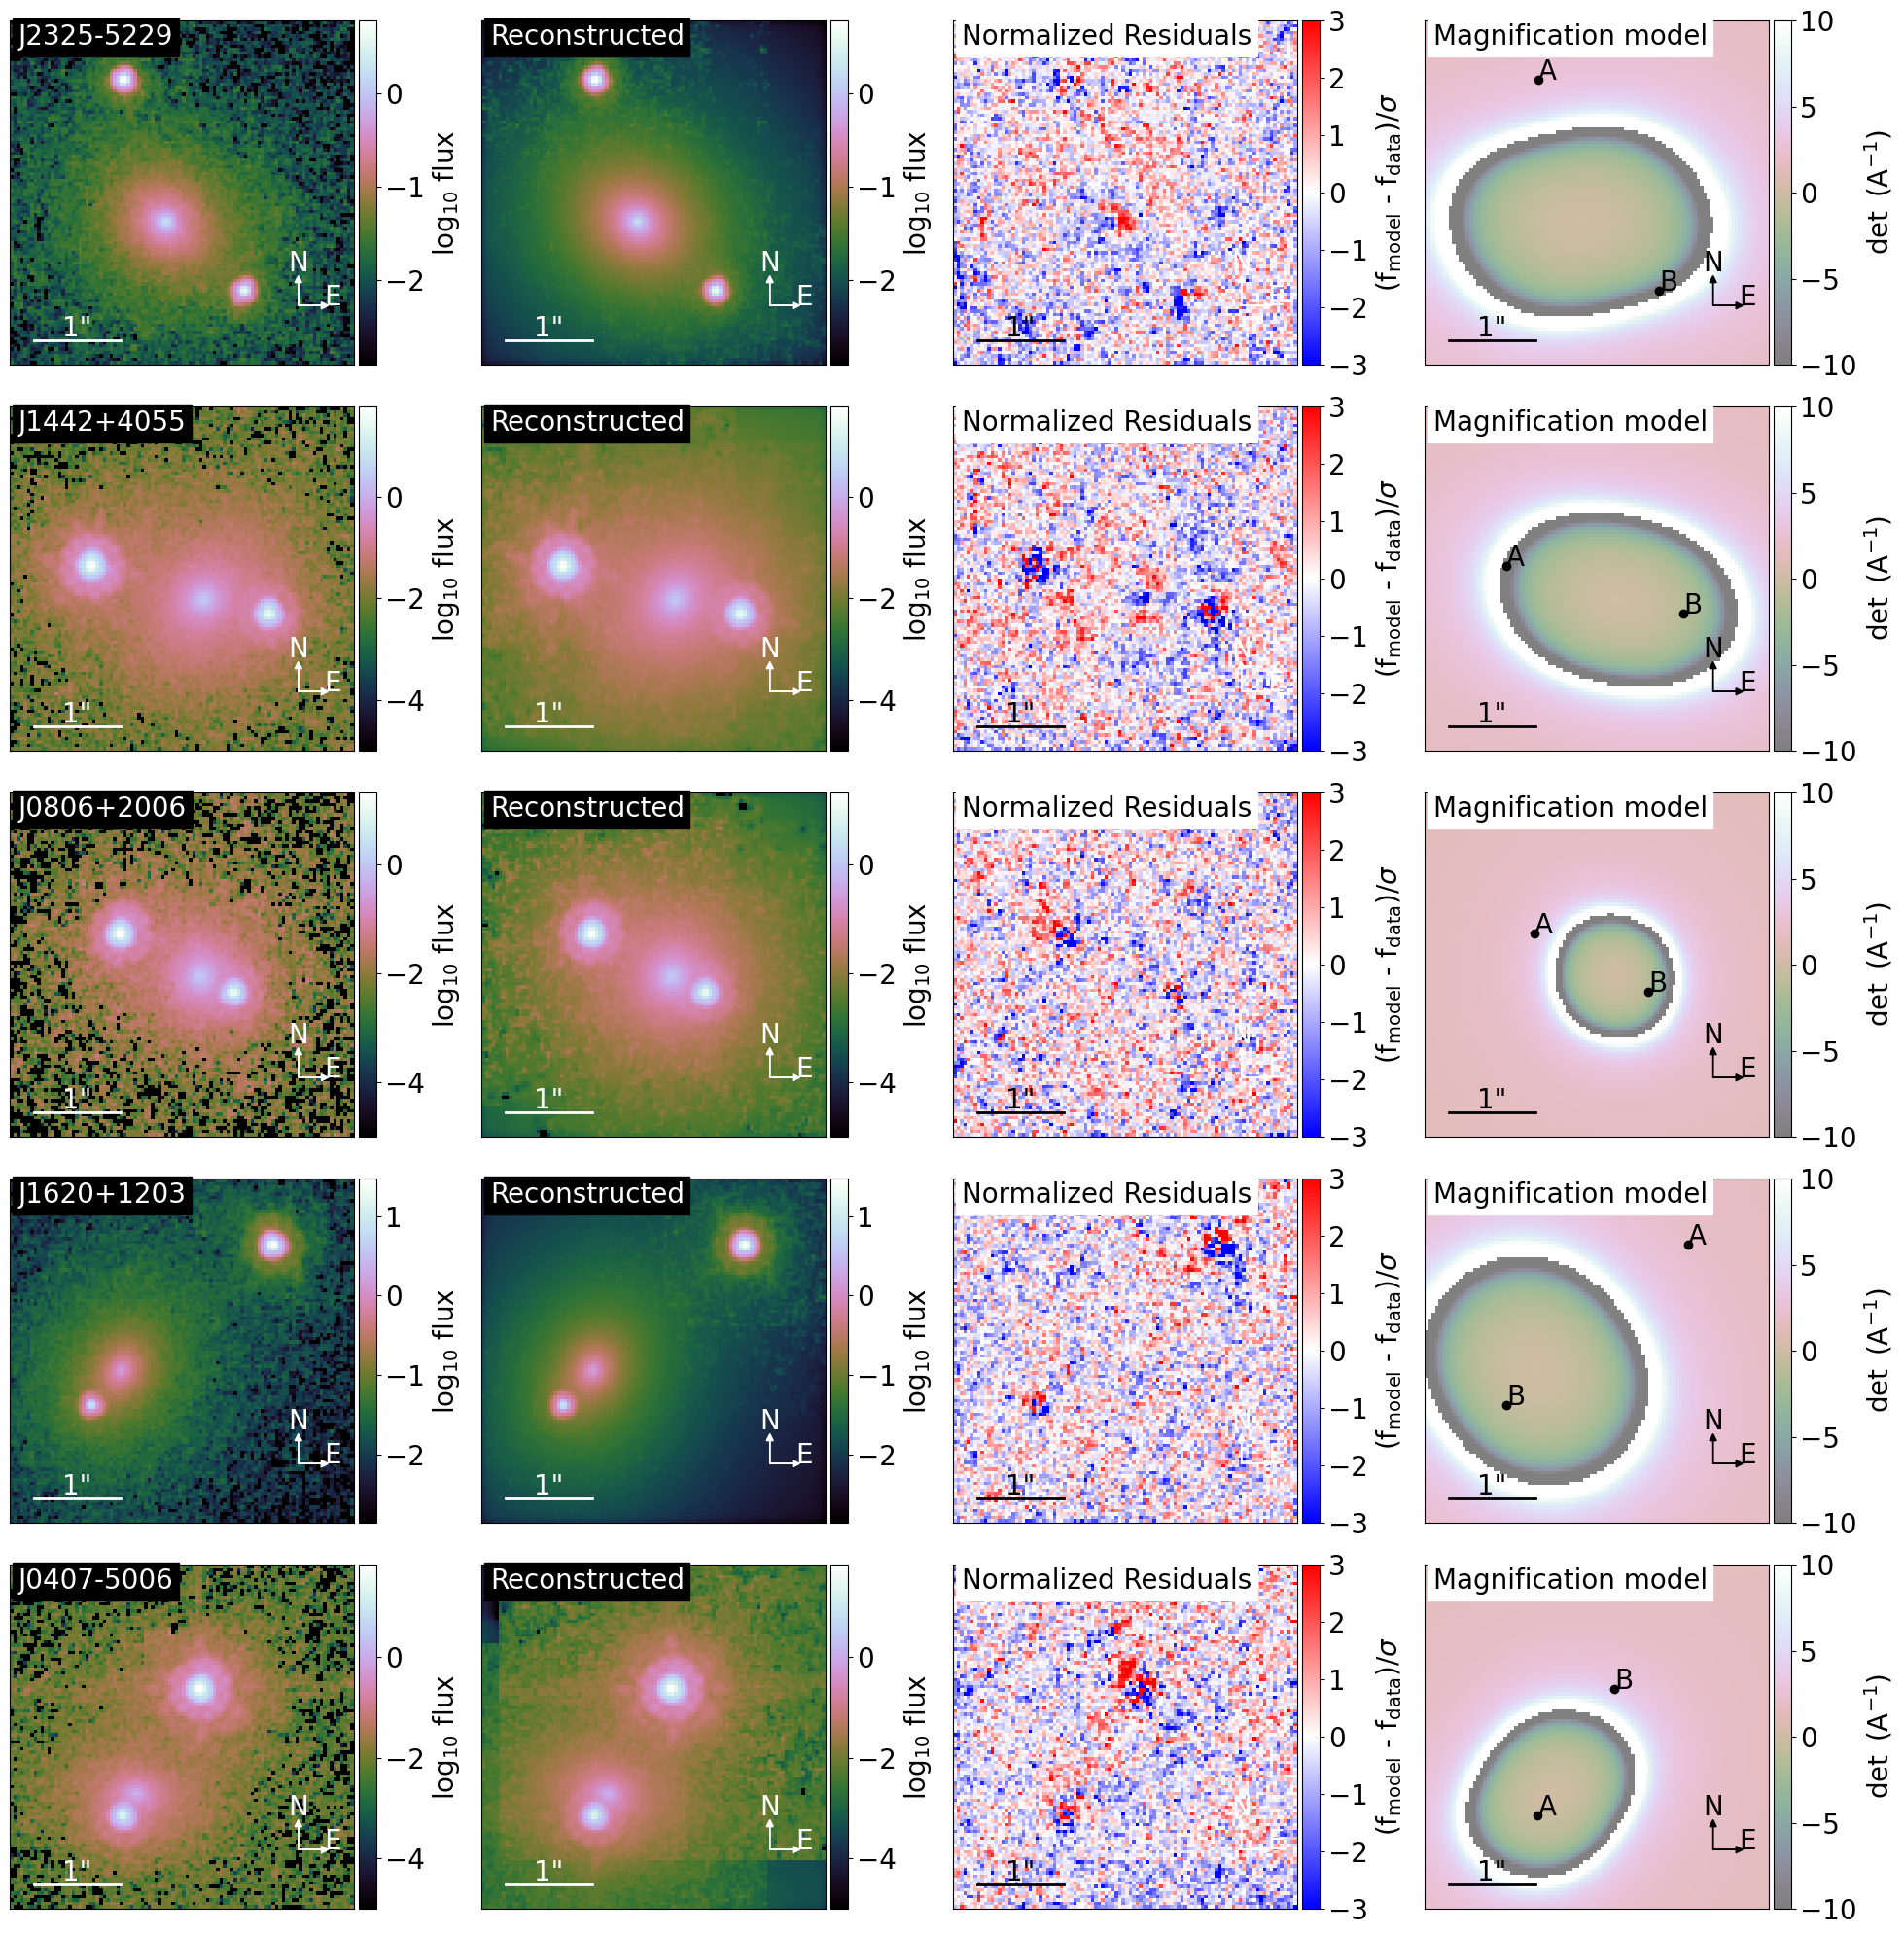

In [29]:
# make a big plot displaying all models

import pickle
import matplotlib.pyplot as plt
from lenstronomy.Plots.model_plot import ModelPlot

# define filters and system name
names = ['J2325-5229', 'J1442+4055', 'J0806+2006', 'J1620+1203', 'J0407-5006']
filter = 'F814W'
fontsize = 20

nrows = len(names)
fig, axes = plt.subplots(nrows, 4, figsize=(20, 20))

for i, name in enumerate(names):
    filename = f"cutout_data/{name}/{filter}/{name}_{filter}_fit.pkl"

    with open(filename, "rb") as f:
        loaded_data = pickle.load(f)

    kwargs_result = loaded_data["kwargs_result"]
    multi_band_list = loaded_data["multi_band_list"]
    kwargs_model = loaded_data["kwargs_model"]

    # initialize model plot
    modelPlot = ModelPlot(multi_band_list, kwargs_model, kwargs_result, arrow_size=0.02, cmap_string="cubehelix")

    # plot data image
    modelPlot.data_plot(ax=axes[i, 0],text=f'{name}',font_size=fontsize)

    # plot model image
    modelPlot.model_plot(ax=axes[i, 1],font_size=fontsize)

    # plot residuals
    modelPlot.normalized_residual_plot(ax=axes[i, 2],v_min=-3,v_max=3,font_size=fontsize)

    # plot magnification model
    modelPlot.magnification_plot(ax=axes[i, 3],font_size=fontsize)

plt.tight_layout()
plt.show()
